In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.2935 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.1429 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.1075 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.0878 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.0745 - accuracy: 0.9768
313/313 - 0s - loss: 0.0701 - accuracy: 0.9781


[0.07010182738304138, 0.9781000018119812]

In [34]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.24594263e-08, 1.54527291e-09, 1.14437435e-05, 8.27469485e-05,
        6.53197080e-11, 1.51319899e-08, 5.70551441e-16, 9.99890924e-01,
        2.64535942e-07, 1.46854991e-05],
       [2.51179166e-08, 1.97276953e-04, 9.99798715e-01, 3.78054801e-06,
        3.39358393e-15, 1.96137378e-07, 3.91736066e-08, 6.82636369e-12,
        5.88851137e-08, 2.76847077e-17],
       [1.97208550e-07, 9.98706579e-01, 2.25406940e-04, 2.93727976e-06,
        1.23395494e-05, 3.48181084e-06, 1.77755774e-05, 6.79019024e-04,
        3.51798226e-04, 5.23655387e-07],
       [9.99589741e-01, 6.14470252e-10, 9.98525356e-05, 5.31138085e-06,
        8.96823053e-07, 1.98834027e-06, 2.95962498e-04, 1.63051823e-06,
        3.88030998e-07, 4.16959074e-06],
       [1.90759079e-06, 2.68780909e-09, 8.10986676e-05, 1.72954785e-07,
        9.94587898e-01, 1.97571151e-08, 2.31328431e-06, 4.60783704e-05,
        1.16407227e-06, 5.27931796e-03]], dtype=float32)>

Some exploratory code to ensure that the model actually works

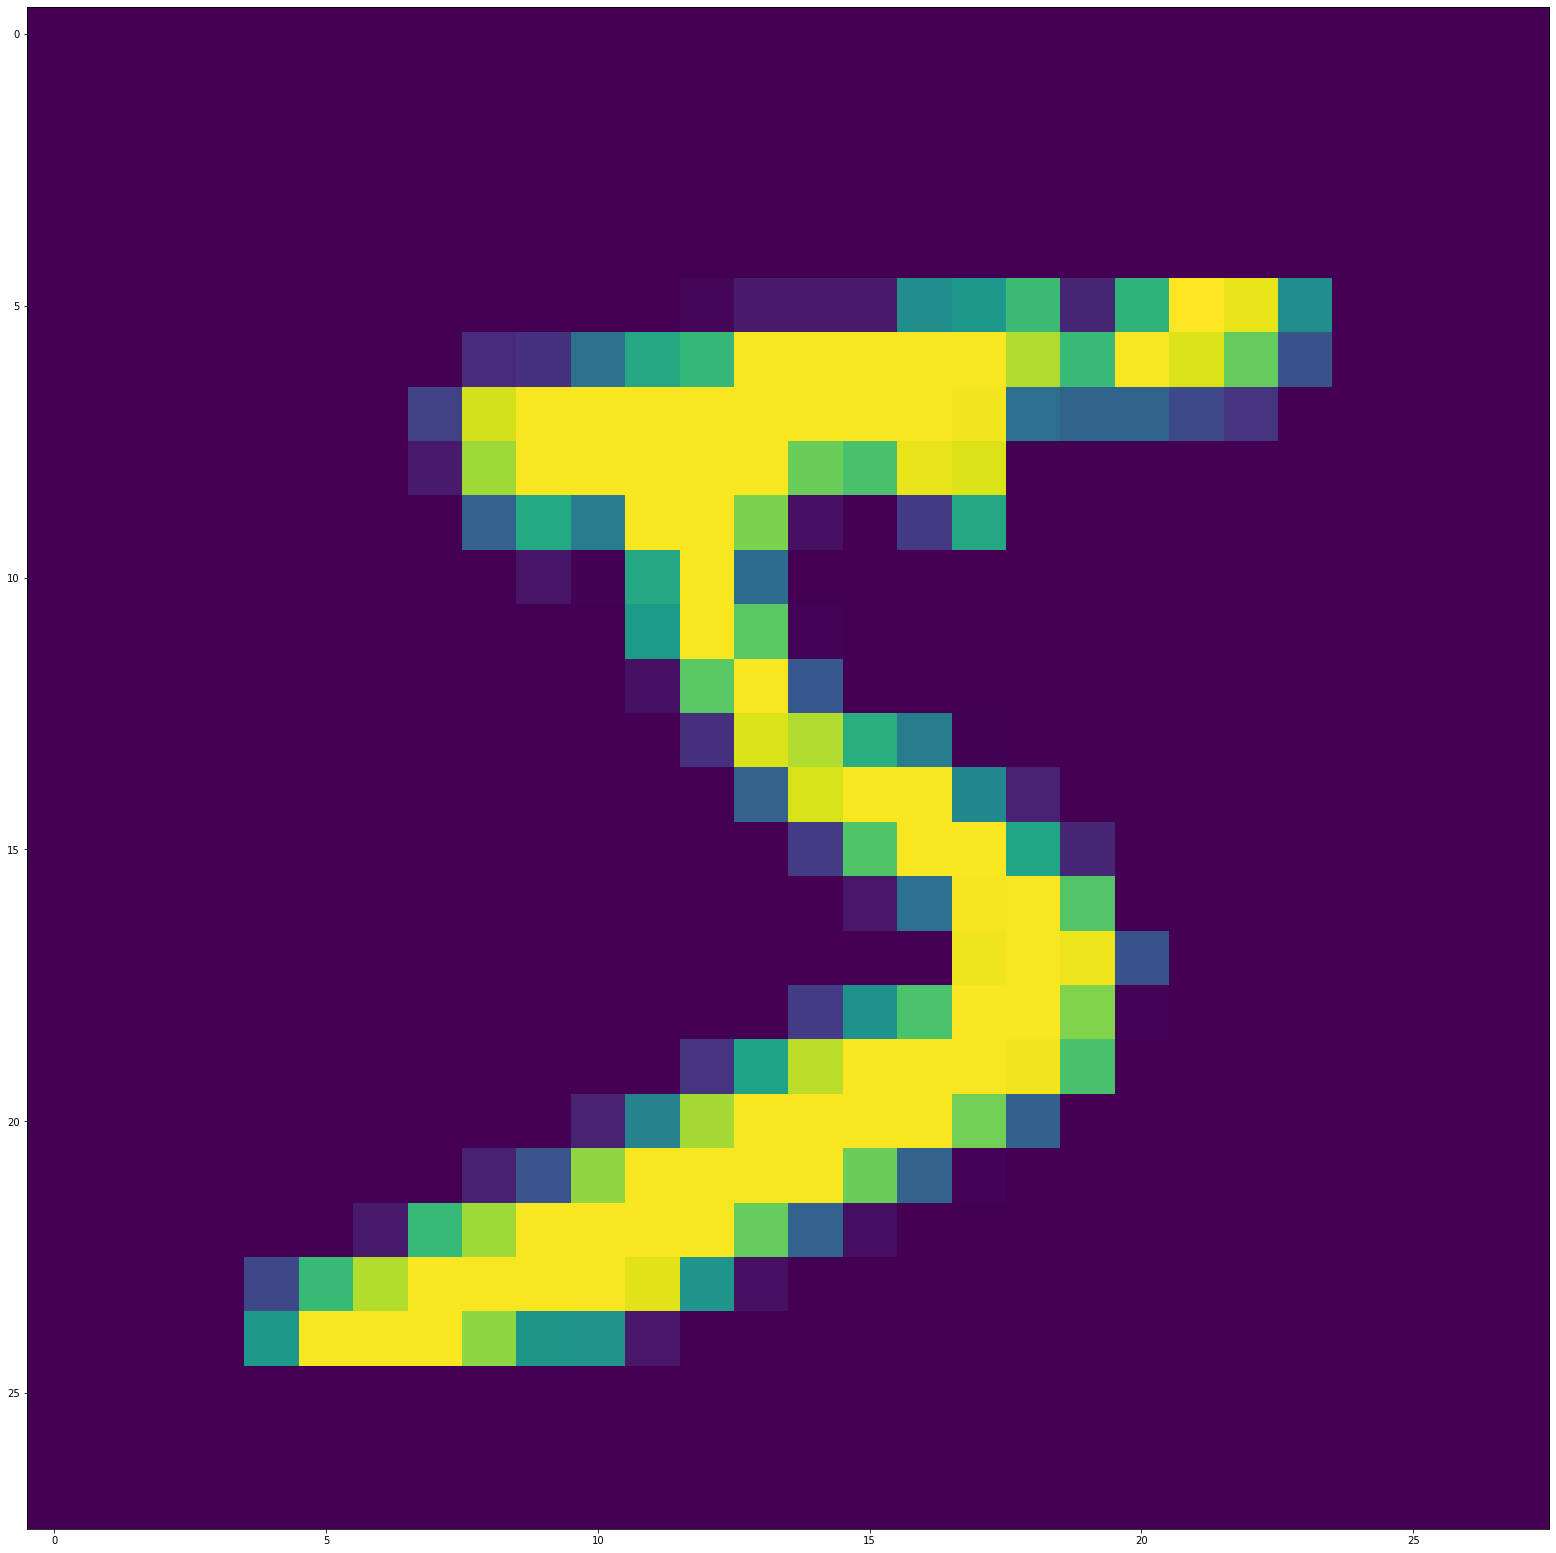

5

In [35]:
import numpy as np

def displayEntry(entry):
    plt.figure(figsize=(len(entry),len(entry[0])))
    plt.imshow(entry)
    plt.show()

displayEntry(x_train[0])

np.argmax(probability_model(x_train[:1]))

Add stuff to explore model structure

In [36]:
probability_model.summary()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 10)                101770    
_________________________________________________________________
softmax_4 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________________________

Try printing out layer maps

In [40]:
layer_names = [layer.name for layer in model.layers]
layer_outputs = [layer.output for layer in model.layers]

maps = model.predict(x_train[:1])